In [64]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, scale
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sms

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
features=["age","bmi","children","charges"]
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

In [8]:
df

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,female,-0.453320,-0.908614,yes,southwest,0.298584
1,-1.509965,male,0.509621,-0.078767,no,southeast,-0.953689
2,-0.797954,male,0.383307,1.580926,no,southeast,-0.728675
3,-0.441948,male,-1.305531,-0.908614,no,northwest,0.719843
4,-0.513149,male,-0.292556,-0.908614,no,northwest,-0.776802
...,...,...,...,...,...,...,...
1333,0.768473,male,0.050297,1.580926,no,northwest,-0.220551
1334,-1.509965,female,0.206139,-0.908614,no,northeast,-0.914002
1335,-1.509965,female,1.014878,-0.908614,no,southeast,-0.961596
1336,-1.296362,female,-0.797813,-0.908614,no,southwest,-0.930362


In [9]:
for col in df.columns:
    if df[col].dtype == "O":
        print(f"For {col} column:")
        print(df[col].value_counts())

For sex column:
male      676
female    662
Name: sex, dtype: int64
For smoker column:
no     1064
yes     274
Name: smoker, dtype: int64
For region column:
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [10]:
label_encode_column=["sex","smoker"]
label_encoder = LabelEncoder()

for col in label_encode_column:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,0,-0.453320,-0.908614,1,southwest,0.298584
1,-1.509965,1,0.509621,-0.078767,0,southeast,-0.953689
2,-0.797954,1,0.383307,1.580926,0,southeast,-0.728675
3,-0.441948,1,-1.305531,-0.908614,0,northwest,0.719843
4,-0.513149,1,-0.292556,-0.908614,0,northwest,-0.776802


In [11]:
df = pd.get_dummies(df, columns=['region'])
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,0,-0.453320,-0.908614,1,0.298584,0,0,0,1
1,-1.509965,1,0.509621,-0.078767,0,-0.953689,0,0,1,0
2,-0.797954,1,0.383307,1.580926,0,-0.728675,0,0,1,0
3,-0.441948,1,-1.305531,-0.908614,0,0.719843,0,1,0,0
4,-0.513149,1,-0.292556,-0.908614,0,-0.776802,0,1,0,0


In [12]:
df.corr()["charges"]

age                 0.299008
sex                 0.057292
bmi                 0.198341
children            0.067998
smoker              0.787251
charges             1.000000
region_northeast    0.006349
region_northwest   -0.039905
region_southeast    0.073982
region_southwest   -0.043210
Name: charges, dtype: float64

In [46]:
import seaborn as sn
import matplotlib. pyplot as plt

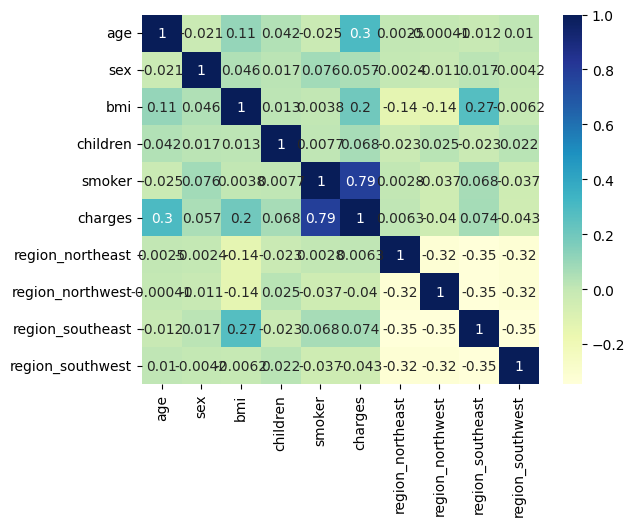

In [47]:
corrMatrix = df.corr()
sn. heatmap(corrMatrix, annot=True,cmap="YlGnBu")
pit. show()

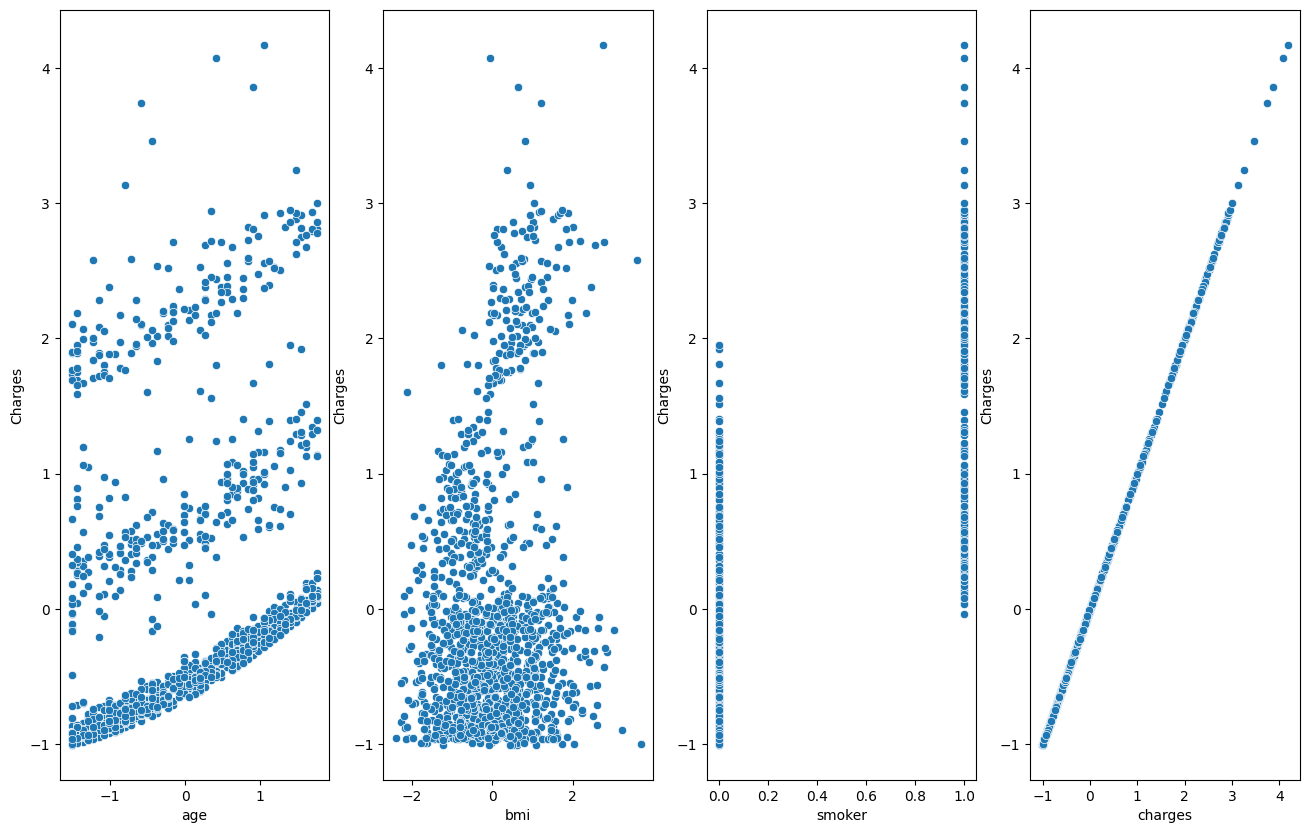

In [13]:
def vis(df):
    a = df.corr()["charges"]
    df_n = df[a[(a > 0.19) & (a < 0.9)].index.tolist()+["charges"]]
    fig, ax = plt.subplots(ncols=df_n.shape[1], figsize = (16,10))
    for col, axis in zip(df_n.columns.tolist(), ax.flatten()):
        sns.scatterplot(x=df_n[col], y=df_n['charges'], data=df_n, ax=axis)
        axis.set_xlabel(col)
        axis.set_ylabel('Charges')
    plt.show()
vis(df)

<Axes: xlabel='age', ylabel='charges'>

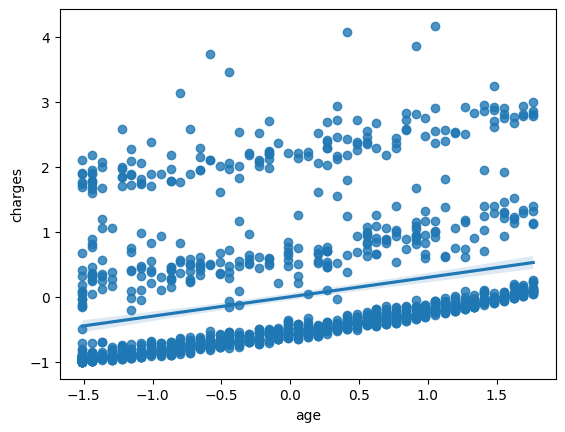

In [14]:
sns.regplot(x="age", y="charges", data=df, fit_reg=True)

In [16]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

In [17]:
columns_to_plot=['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest']

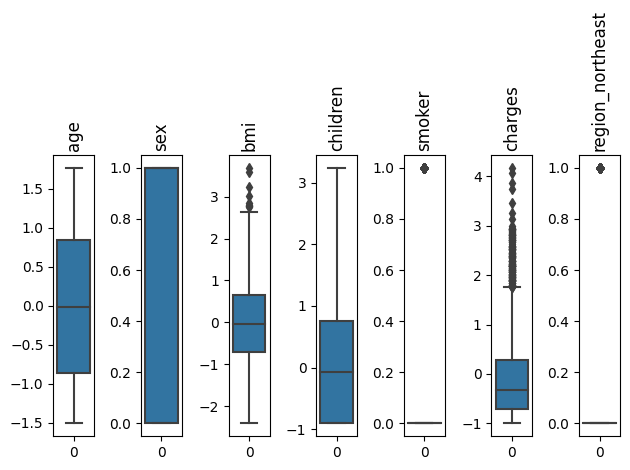

In [18]:
fig, axes = plt.subplots(ncols = len(columns_to_plot[:7]))
for column, axis in zip(columns_to_plot[:7], axes):
    sns.boxplot(data = df[column], ax = axis) 
    axis.set_title(column, rotation =90)
plt.tight_layout()
plt.show()

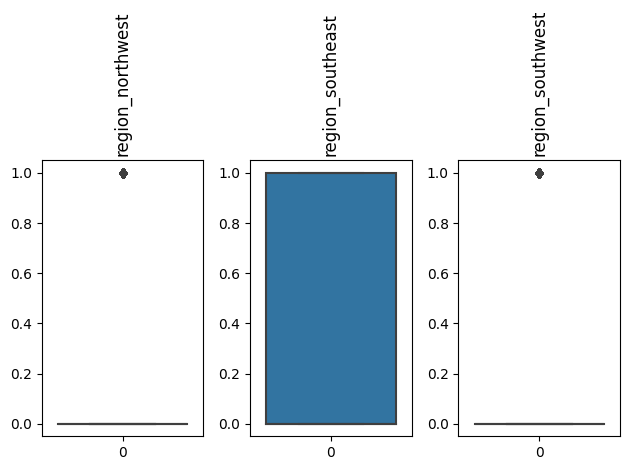

In [19]:
fig, axes = plt.subplots(ncols = len(columns_to_plot[7:]))
for column, axis in zip(columns_to_plot[7:], axes):
    sns.boxplot(data = df[column], ax = axis) 
    axis.set_title(column, rotation =90)
plt.tight_layout()
plt.show()

In [21]:
X = df[["age"]]
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

print('Mean squared error:', mse)
print('R2 Score:', r2)

Mean squared error: 0.8984505963732059
R2 Score: 0.10204905420336463


In [24]:
X = df[["age","smoker"]]
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

print('Mean squared error:', mse)
print('R2 Score:', r2)

Mean squared error: 0.2589168530380243
R2 Score: 0.7412271370215588


### Multikollinearliqa baxaq

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
X_v = df.drop('charges', axis=1)
vif = pd.DataFrame()
vif["Variable"] = X_v.columns
vif["VIF"] = [variance_inflation_factor(X_v.values, i) for i in range(X_v.shape[1])]

print(vif)

           Variable       VIF
0               age  1.016822
1               sex  1.008900
2               bmi  1.106630
3          children  1.004011
4            smoker  1.012074
5  region_northeast  1.314644
6  region_northwest  1.292976
7  region_southeast  1.425105
8  region_southwest  1.278919


### Normaldir.

In [34]:
X = df[["age","smoker","bmi"]]
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

print('Mean squared error:', mse)
print('R2 Score:', r2)

Mean squared error: 0.2346226470289117
R2 Score: 0.7655078324224212


In [38]:
df["charges"].min()

-1.003557345258499

In [30]:
def outlier(df,col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    df_out=df[(df[col]>q3+1.5*iqr)|(df[col]<q1-1.5*iqr)]
    return df_out

In [31]:
outlier(df,"age")

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest


In [33]:
outlier(df,"bmi")

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
116,1.338082,1,3.017861,-0.908614,0,-0.156053,0,0,1,0
286,0.483668,0,2.855457,0.751079,0,-0.317005,1,0,0,0
401,0.554869,1,2.765233,-0.078767,0,-0.428442,0,0,1,0
543,1.053277,0,2.747188,-0.908614,1,4.171663,0,0,1,0
847,-1.153959,1,3.234400,-0.078767,0,-0.894831,0,0,1,0
860,-0.157143,0,2.778356,0.751079,1,2.713075,0,0,0,1
1047,-1.225161,1,3.595298,-0.078767,1,2.579903,0,0,1,0
1088,0.910875,1,2.801322,-0.078767,0,-0.290902,0,0,1,0
1317,-1.509965,1,3.685522,-0.908614,0,-1.000122,0,0,1,0


In [39]:
import statsmodels.api as sm

In [49]:
X = df[['age']]
y = df['charges']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

influence = model.get_influence()
(c, _) = influence.cooks_distance
threshold = 4 / (len(df)-5-1)
org_outliers = np.where(c > threshold)[0]
print("Original outliers:", org_outliers)

Original outliers: [  14   30   34   39   55   57   82   86   94  109  161  175  203  223
  240  251  252  256  259  263  265  271  281  288  292  314  328  330
  373  377  381  420  421  476  488  503  516  530  543  549  569  577
  587  609  618  623  668  674  677  706  725  738  739  742  759  803
  819  826  842  845  860  883  893  901  911  951  956 1001 1021 1031
 1036 1042 1047 1062 1093 1096 1117 1120 1122 1124 1139 1146 1156 1186
 1196 1230 1240 1241 1267 1284 1288 1291 1300 1301 1308 1313]


In [54]:
df.loc[14,"age"] ###ust uste dusmur cunki agede outlier yoxdu

-0.8691547384288119

In [55]:
X = df[['bmi']]
y = df['charges']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

influence = model.get_influence()
(c, _) = influence.cooks_distance
threshold = 4 / (len(df)-5-1)
org_outliers = np.where(c > threshold)[0]
print("Original outliers:", org_outliers)

Original outliers: [  14   34   38   39   55   94  109  128  175  185  251  252  265  281
  288  292  312  327  328  330  377  401  420  421  442  454  488  521
  530  543  549  569  577  609  615  629  660  665  674  706  725  736
  739  796  803  819  847  852  860  883  893  901  917  930  951 1022
 1031 1047 1062 1070 1090 1096 1111 1122 1124 1131 1146 1156 1230 1240
 1241 1284 1288 1300 1317 1323]


In [56]:
outlier(df,"bmi") #1317,401,543,847,860,1047

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
116,1.338082,1,3.017861,-0.908614,0,-0.156053,0,0,1,0
286,0.483668,0,2.855457,0.751079,0,-0.317005,1,0,0,0
401,0.554869,1,2.765233,-0.078767,0,-0.428442,0,0,1,0
543,1.053277,0,2.747188,-0.908614,1,4.171663,0,0,1,0
847,-1.153959,1,3.234400,-0.078767,0,-0.894831,0,0,1,0
860,-0.157143,0,2.778356,0.751079,1,2.713075,0,0,0,1
1047,-1.225161,1,3.595298,-0.078767,1,2.579903,0,0,1,0
1088,0.910875,1,2.801322,-0.078767,0,-0.290902,0,0,1,0
1317,-1.509965,1,3.685522,-0.908614,0,-1.000122,0,0,1,0


<Axes: xlabel='charges', ylabel='Density'>

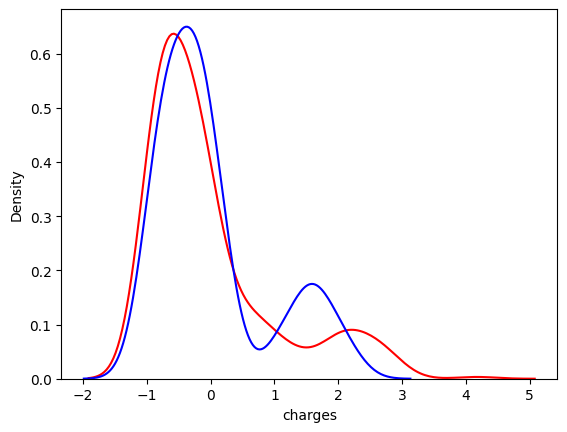

In [48]:
sns.kdeplot(data=y_test,color="red")
sns.kdeplot(data=y_pred,color="blue")

In [58]:
X = df[["age","smoker","bmi"]]
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
import statsmodels.formula.api as smf

In [69]:
model=smf.ols(formula="charges~age+smoker+bmi",data=df).fit()

In [70]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1316.
Date:                Wed, 05 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:56:19   Log-Likelihood:                -977.83
No. Observations:                1338   AIC:                             1964.
Df Residuals:                    1334   BIC:                             1984.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4030      0.015    -26.119      0.000      -0.433      -0.373
age            0.3011      0.014     21.748      0.000       0.274       0.328
smoker         1.9680      0.034     57.703      0.000       1.901       2.035
bmi            0.1625      0.014     11.737      0.000       0.135       0.190
==============================================================================
Omnibus:                      299.709   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              710.137
Skew:                           1.213   Prob(JB):                    6.25e-155
Kurtosis:                       5.618   Cond. No.                         2.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""